In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


import warnings
warnings.filterwarnings('ignore')

In [236]:
df = pd.read_csv('data/cars_data.csv')

In [237]:
df

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180


In [238]:
df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [239]:
df.isna().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [240]:
df.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [241]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [242]:
cols=['MSRP','Invoice']

for col in cols:

    df[col]=df[col].str.replace('$','')
    df[col]=df[col].str.replace(',','')
    df[col]=df[col].astype('int')

In [243]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


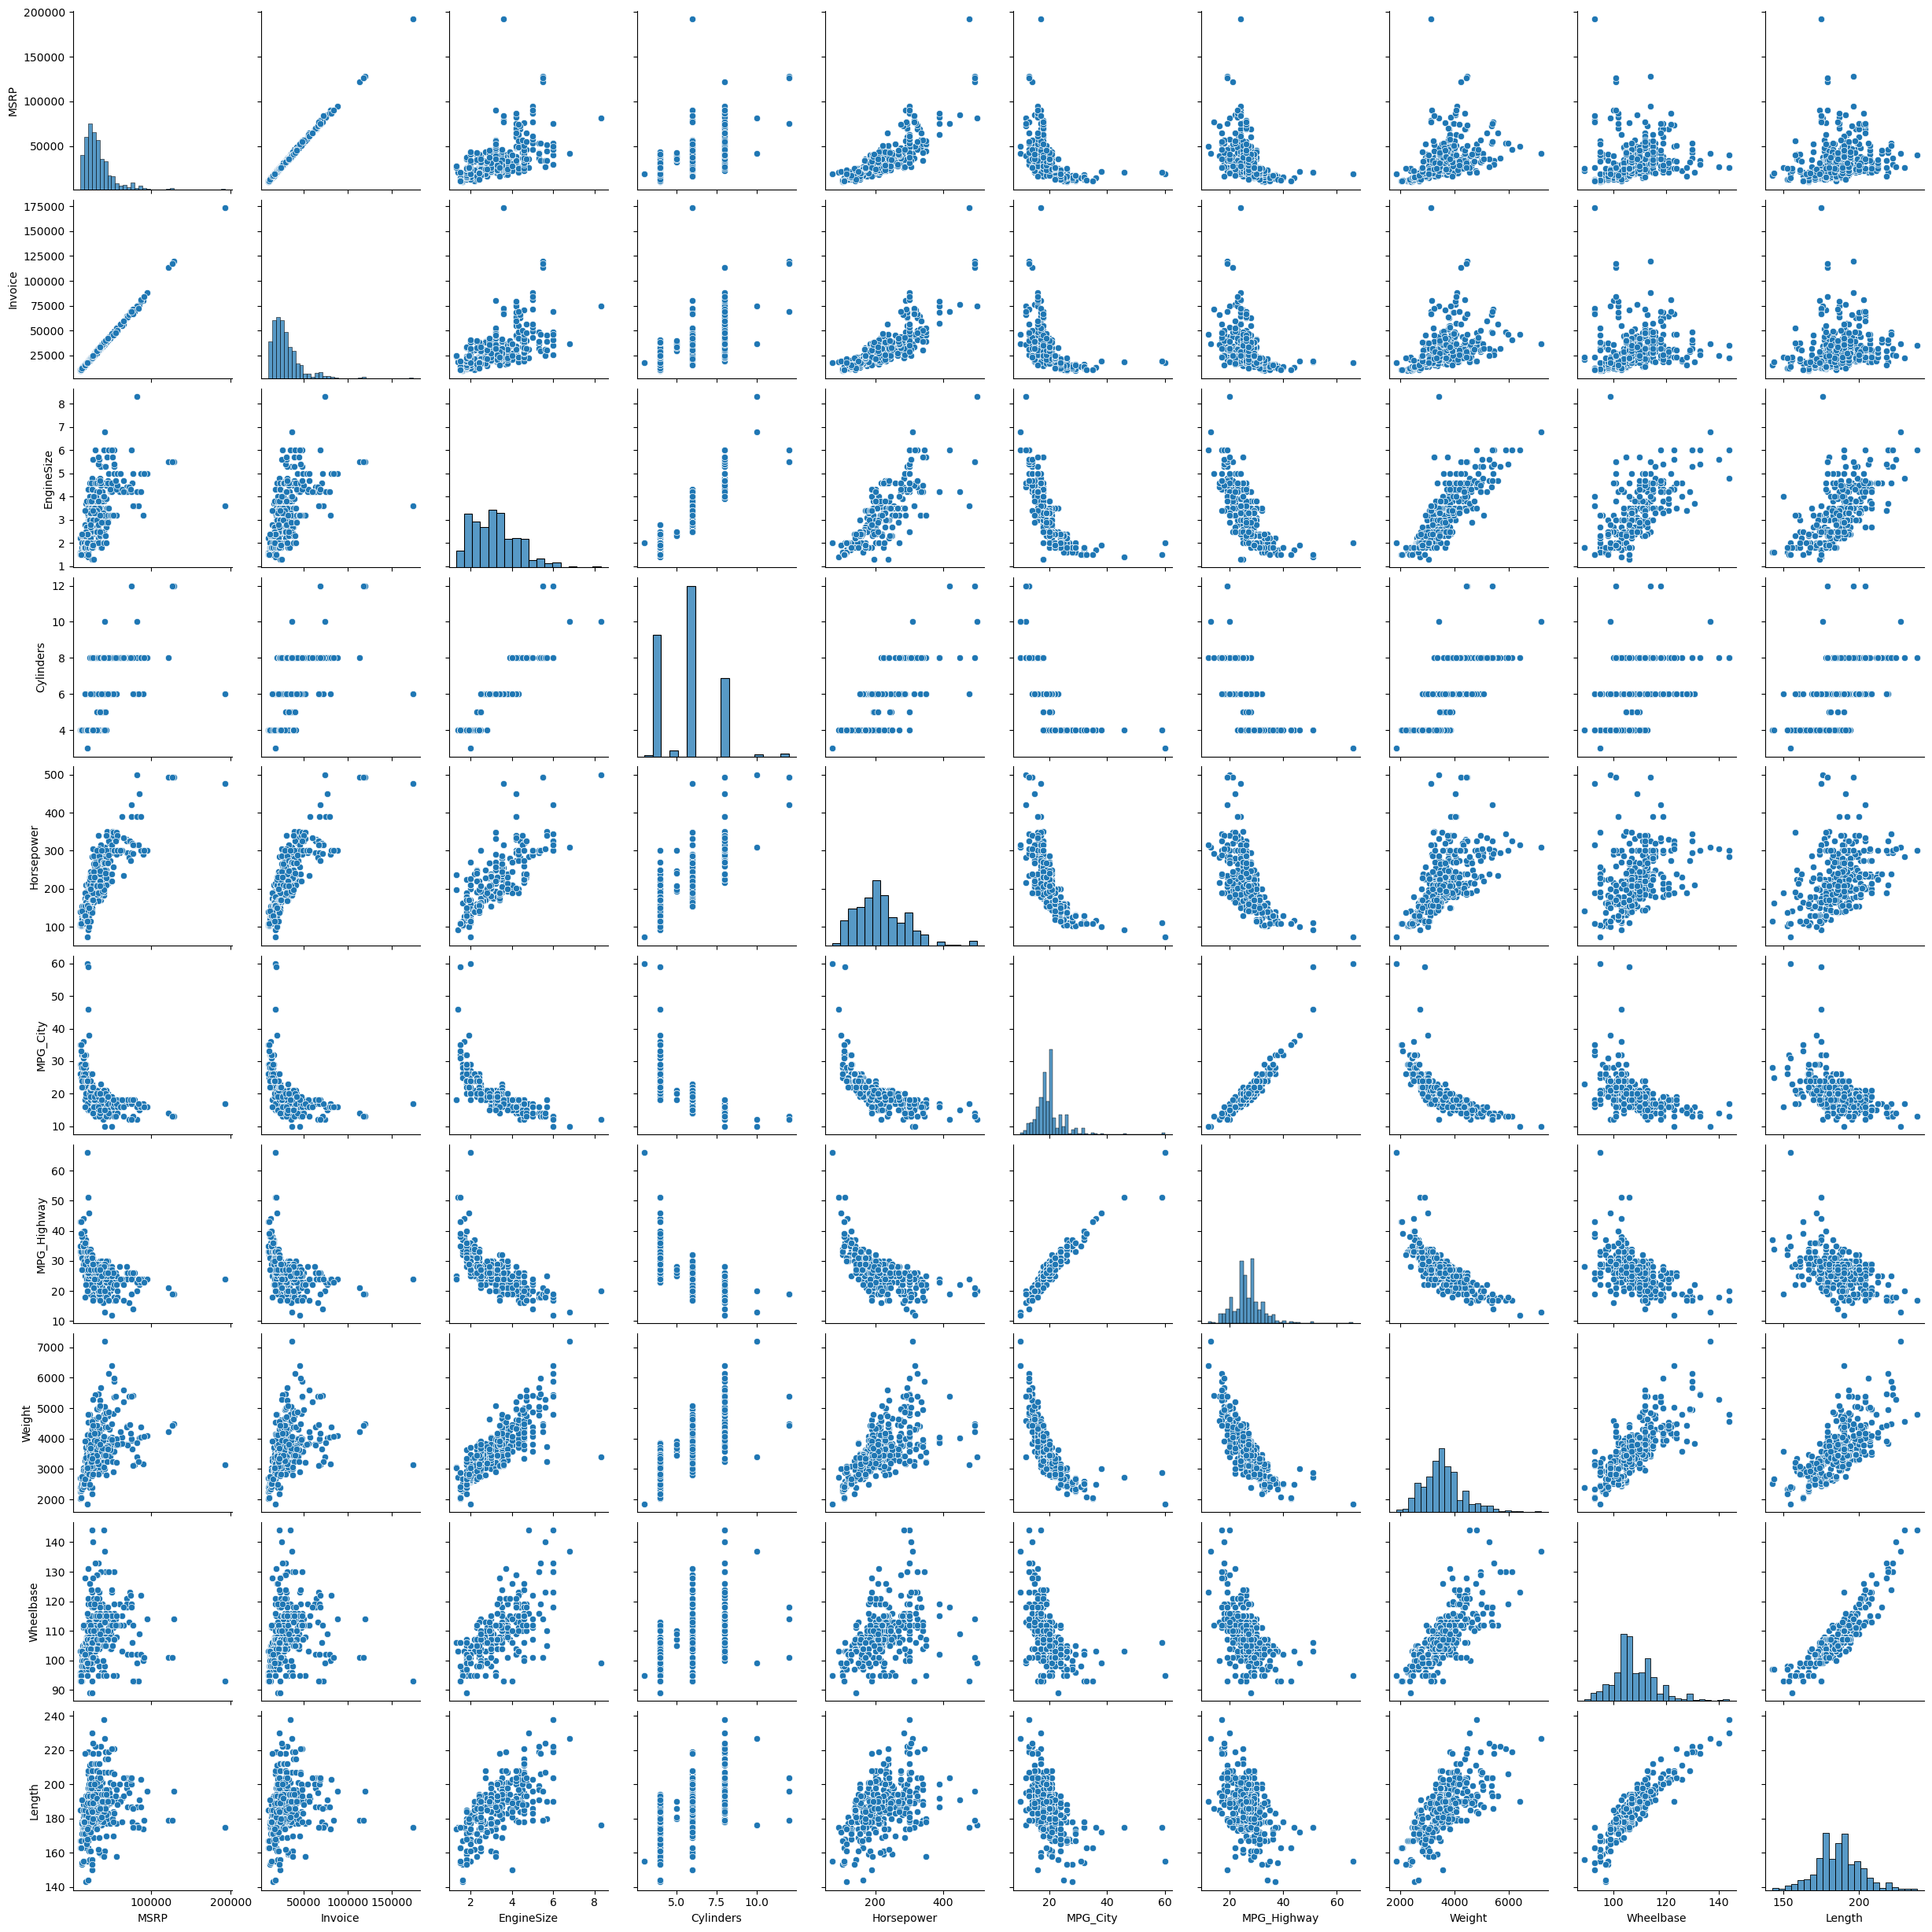

In [244]:
sns.pairplot(df)
plt.show()

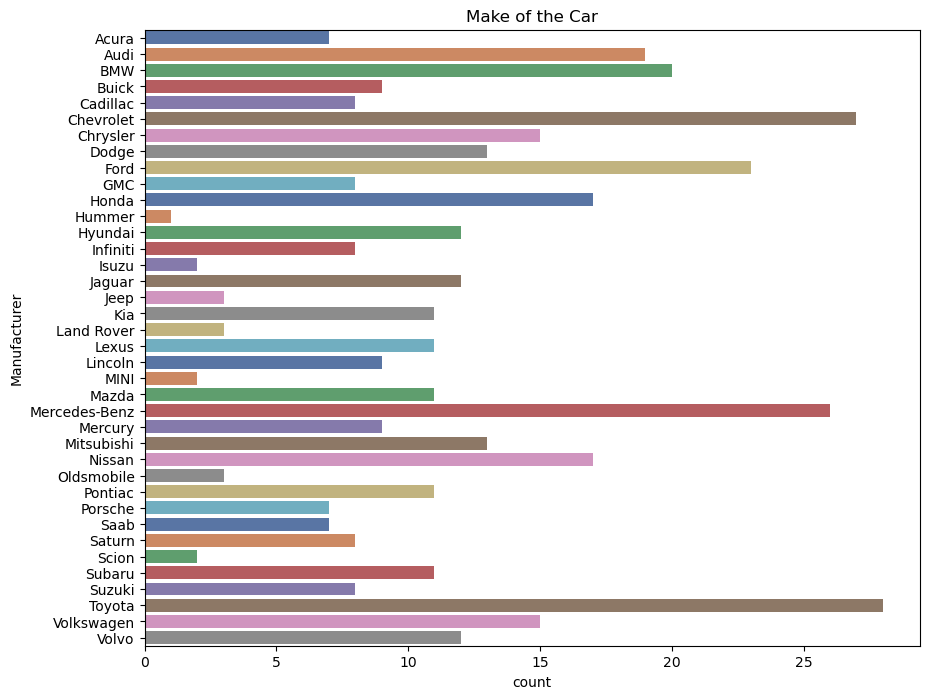

In [245]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df,y='Make',palette='deep')
plt.title('Make of the Car')
plt.ylabel('Manufacturer')
plt.show()

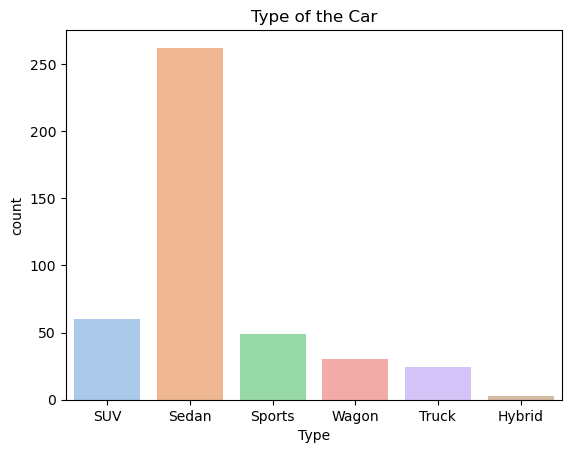

In [246]:
sns.countplot(data=df,x='Type',palette='pastel')
plt.title('Type of the Car')
plt.show()

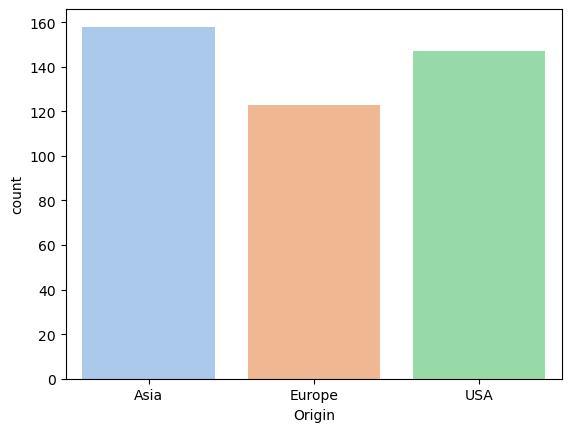

In [247]:
sns.countplot(data=df,x='Origin',palette='pastel')
plt.show()


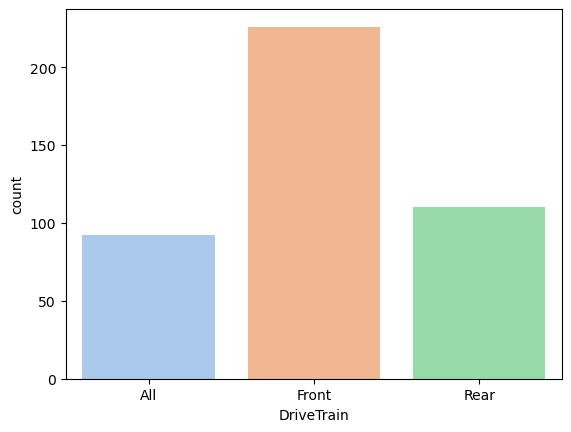

In [248]:
sns.countplot(data=df,x='DriveTrain',palette='pastel')
plt.show()

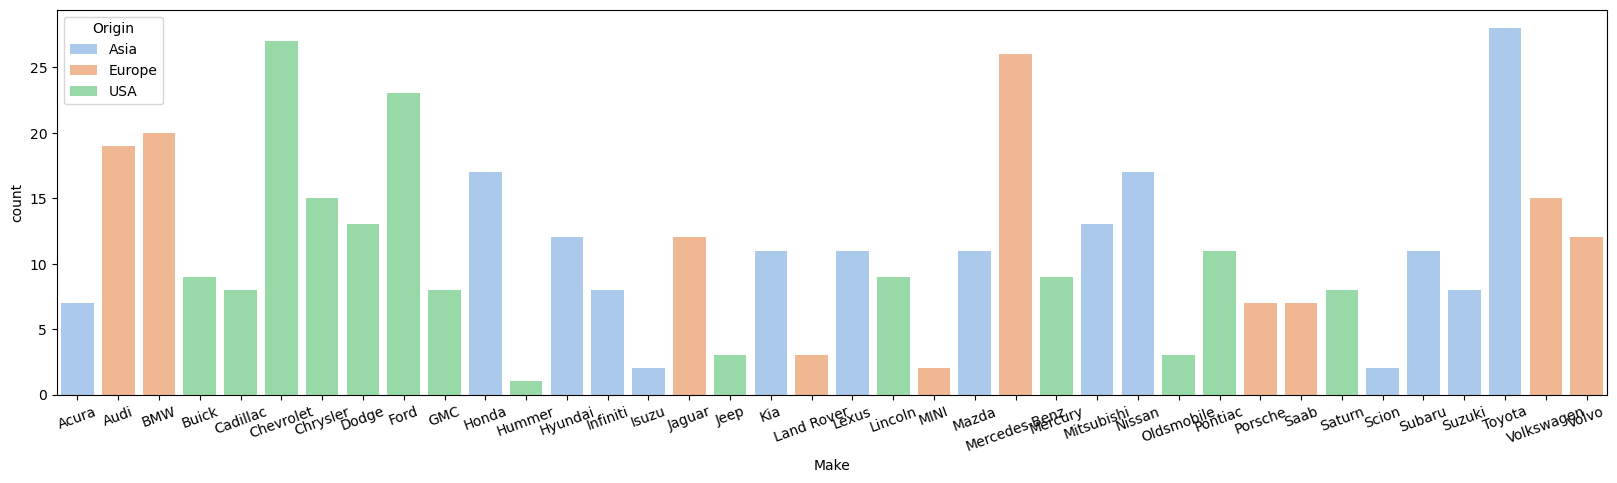

In [249]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df,x='Make',palette='pastel',hue='Origin')
plt.xticks(rotation=20)
plt.show()

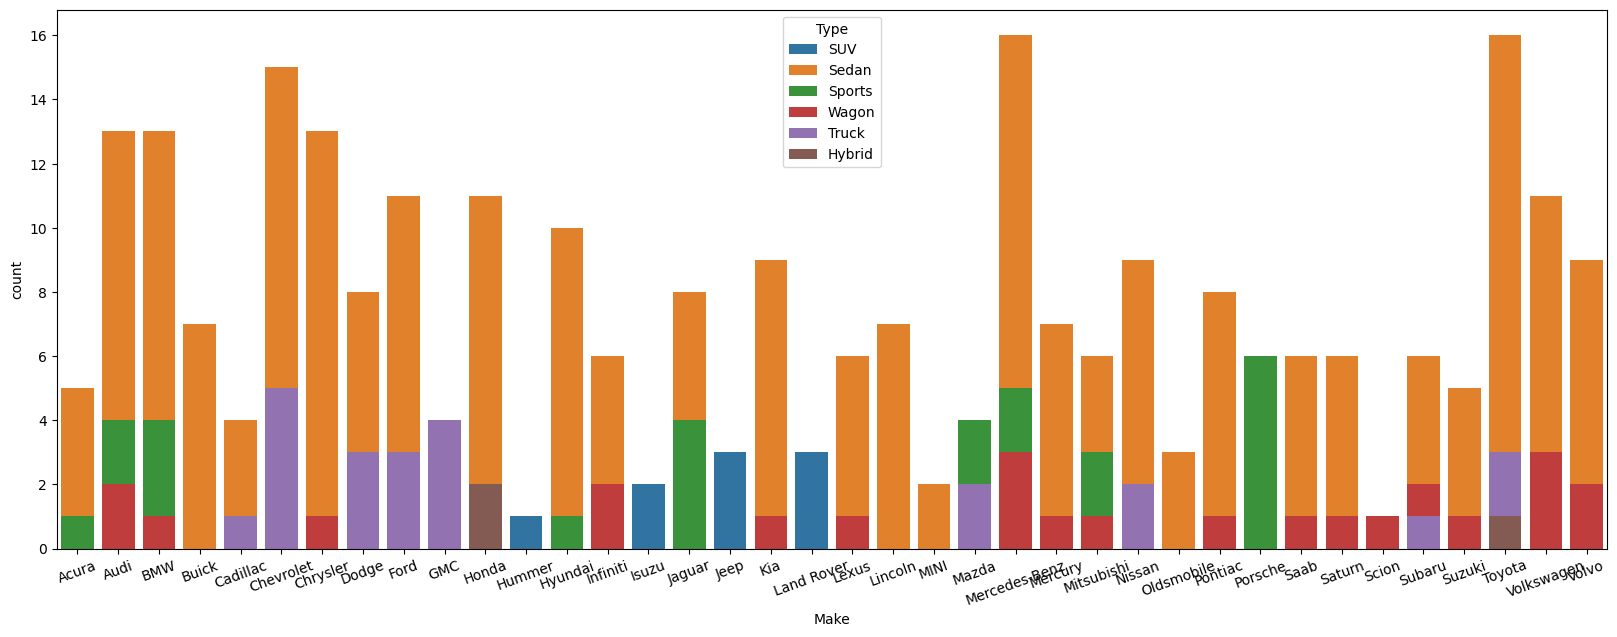

In [250]:
plt.figure(figsize=(20,7))
sns.countplot(data=df,x='Make',hue='Type',dodge=False)
plt.xticks(rotation=20)
plt.show()

<Axes: >

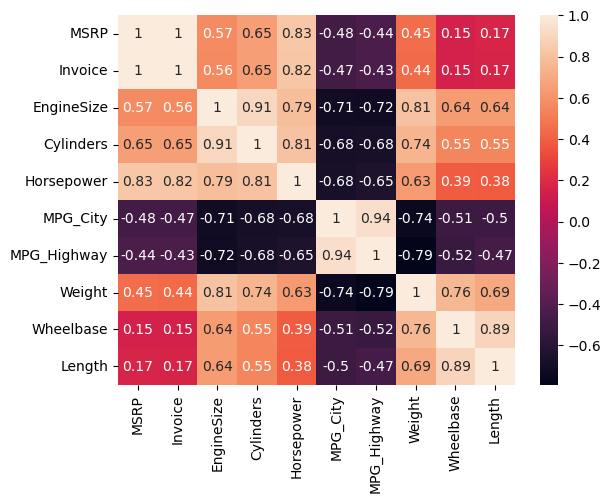

In [251]:
sns.heatmap(df.select_dtypes(exclude='object').corr(),annot=True)

In [252]:
df.drop(columns='Invoice',inplace=True)

In [253]:
df.isna().sum()
df.dropna(inplace=True)

In [254]:
X=df.drop(columns='MSRP')
y=df['MSRP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [255]:
ct1=ColumnTransformer([
    ('scale',StandardScaler(),['EngineSize','Cylinders','Horsepower','MPG_City','MPG_Highway','Weight','Wheelbase','Length']),
    ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'),['Make', 'Model', 'Type', 'Origin', 'DriveTrain'])
])


In [256]:
X_train_scaled=ct1.fit_transform(X_train)
X_test_scaled=ct1.transform(X_test)

In [257]:
def plot_results(model_type, y_pred):
    print('R2 score:',r2_score(y_test,y_pred))
    print('MAE',mean_absolute_error(y_test,y_pred))
    print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

    fig = sns.regplot(x=y_pred, y=y_test, color='red', marker='^')
    fig.set(title=model_type, xlabel='Predicted Price of Used Cars($)', ylabel='Actual Price of the used cars ($)');

R2 score: 0.857702293624585
MAE 5188.726708240602
RMSE 6637.614983641085


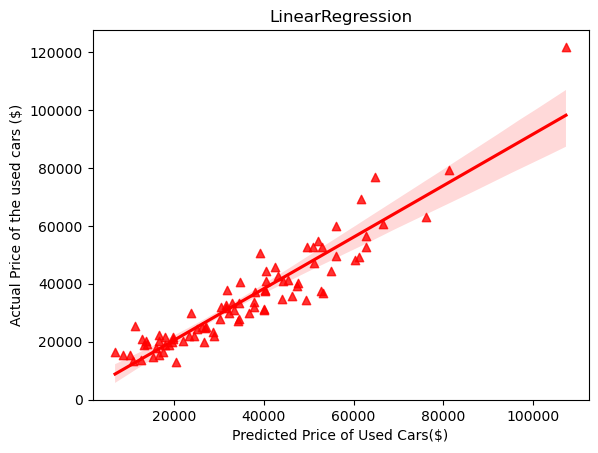

In [258]:
model_lr=LinearRegression()
model_lr.fit(X_train_scaled,y_train)
y_pred_lr=model_lr.predict(X_test_scaled)
plot_results('LinearRegression',y_pred_lr)


R2 score: 0.8592827917821763
MAE 4471.093023255814
RMSE 6600.650117734175


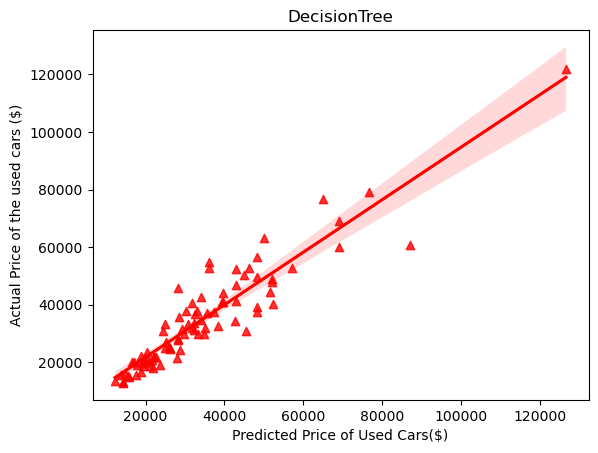

In [259]:
model_dt=DecisionTreeRegressor()
model_dt.fit(X_train_scaled,y_train)
y_pred_dt=model_dt.predict(X_test_scaled)

plot_results('DecisionTree',y_pred_dt)

R2 score: 0.8661596636316677
MAE 4334.790930232558
RMSE 6437.342510686793


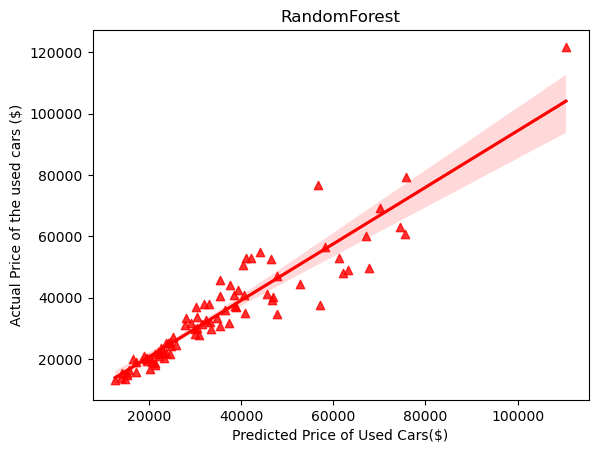

In [260]:
model_rf=RandomForestRegressor()
model_rf.fit(X_train_scaled,y_train)
y_pred_rf=model_rf.predict(X_test_scaled)

plot_results('RandomForest',y_pred_rf)

R2 score: 0.8851004574030575
MAE 3931.8053219941157
RMSE 5964.4754777910985


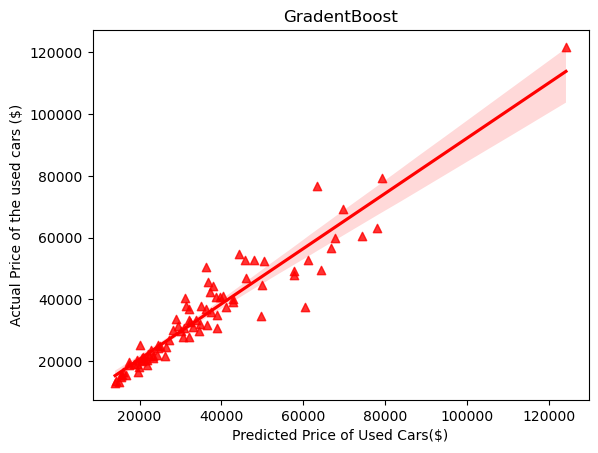

In [261]:
model_gb=GradientBoostingRegressor()
model_gb.fit(X_train_scaled,y_train)
y_pred_gb=model_gb.predict(X_test_scaled)

plot_results('GradentBoost',y_pred_gb)

R2 score: 0.798766016960144
MAE 4792.963946675145
RMSE 7893.393329846074
R2 score: 0.798766016960144
MAE 4792.963946675145
RMSE 7893.393329846074


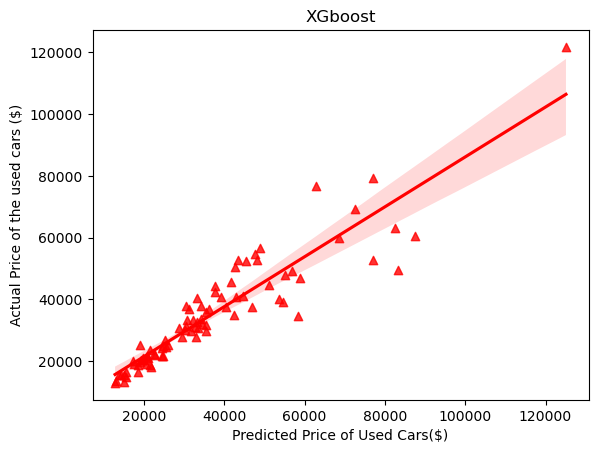

In [262]:
model_xgb=XGBRegressor()
model_xgb.fit(X_train_scaled,y_train)
y_pred_xgb=model_xgb.predict(X_test_scaled)

print('R2 score:',r2_score(y_test,y_pred_xgb))
print('MAE',mean_absolute_error(y_test,y_pred_xgb))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_xgb)))

plot_results('XGboost',y_pred_xgb)